# Empirical Analysis Practice

# Introduction:
PageRank (PR) is an algorithm which rank websites in their Google Search engine results. PR is one of approaches to measuring the importance of website pages by calculating ranks based on the proportional rank.

## PageRank Theory
The PR ranks depend on the number of pages, damping factor, and a number of iterations. The PageRank relies on an arbitrary probability distribution in which a person randomly clicks on links will arrive at any particular page. The probability which a person independently will continue is a damping fator d. PR computations require iterations through a number of pages to adjust approximate PR values to the theoretical value.

## Theoretical Complexity
Time Complexity O(k*N) where k represents the specific number of repeats of the code that needs to be run on page N.
Space Complexity O(N), meaning that it takes up as much space as the number of pages in Google. 


## PageRank Equation
The iteration equation of the page rank value of  𝑖  is given by

**PR(n) = (1-d)/N + d*(PR(n1)/num_neighbors(n1) + ... + PR(n_last)/num_neighbors(n_last))**

where the damping factor $d=D$, $\frac{d}{n}$ denotes random walk score, $OutputDegree(P_j)$ denote how many pages are linked as children pages for the page $j$.

## 2. Canonical test data (might be a script to generate it)
   2.1 Sample test data to run with the algorithm (this can be interesting examples to show the utility of the algorithm)

3. The actual code of the algorithm which can indeed run

In [11]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from time import perf_counter
np.set_printoptions(precision=3)  # the precision to print


In [12]:
# n = 6  # the number of pages  
# d = 0.15  # damping factor 
# T = 1  # the number of iteration

def pageRank(n, d, T):
    PR = np.ones(n)/n # Initialize the PageRank of every node with a value of 1/n | O(n)

    for i_t in range(T): # For each iteration, update the PageRank of every node in the graph | O(k) where k is number of iteration
        rand = rand = 1 / n  # for the pages 1: it can only be reached through random walk | assign value: O(1)
        PR[0] = d * rand  # assign value & computation: O(1) 
        
        # for other pages: they can be reached through either random walk or inter-page links
        for i in range(1, n): # O(n) where n is nu,ber of pages 
            i_prop = PR[i-1] / 1 # Sum up the proportional rank from all of its in-neighbors | O(1)
            rand  # the probability of randomly walking out the links | O(1)
            PR[i] = d * rand + (1-d) * i_prop # Update the PageRank with the weighted sum of proportional rank and random walk | O(1)
        
# normalize PR when there is terminal point    
    PR /= PR.sum() # O(1)
    return PR

print(pageRank(6, 0.15, 1))

[0.061 0.112 0.156 0.193 0.225 0.252]


In [13]:
def insertionSort(nums):
    global count
    for i in range(1, len(nums)):
        count += 2 # assignment
        key = nums[i]
        left = i - 1
        
        count += 1 # comparision
        while key <= nums[left] and left >= 0:
            count += 2 # shifting
            nums[left + 1] = nums[left]
            left -= 1
            
        count += 1 # assignment  
        nums[left + 1] = key
    return count

print(insertionSort([4, 3, 10,2, 1]))

2174038


In [14]:
def quickSort(nums):
    def helper(start, end, nums):
        global count 
        # base case => if length of sub-arr is less than 2, return
        
        count += 1
        if start >= end:
            return
        
        # choose random pivot from start to end index
        
        count += 2 # assignment & random int
        randomIdx = random.randint(start, end)
        # swap the randomIdx to start 
        count += 1 # swap
        nums[start], nums[randomIdx] = nums[randomIdx], nums[start]
        
        # partition smaller element to left of pivot & greater element to right 
        count += 1 # assignment 
        p = start
        for i in range(start + 1, end + 1):
            
            count += 1 # comparision
            if nums[p] >= nums[i]:
                
                count += 2 # assigment, addition
                p += 1
                nums[i], nums[p] = nums[p], nums[i]
        nums[p], nums[start] = nums[start], nums[p]
        
        # recurse left of pivot & right of pivot
        helper(start, p - 1, nums)
        count += 1 # recursion 
        
        helper(p + 1, end, nums)
        count += 1 # recursion
    
    helper(0, len(nums) - 1, nums)
    return count

        
print(quickSort([4, 3, 2, 1]))
        
        

2174061


In [15]:
def new_array_nums(_n):
    return np.random.randint(_n, size=_n)


global count
b_ops, f_ops = [], []
N_RUNS = (5, 10, 50, 100, 5000)  # , 1000000, 3000000)

for n in N_RUNS:
    vals = new_array_nums(n)
    count = 0

    r = quickSort(vals)

    b_ops += [count]
    print(
        f'Given {len(vals):8d} elments of unsorted arrays, total #ops of quick sort: {count:10d}')
    count = 0
    r = insertionSort(vals)
    f_ops += [count]
    print(
        f'Given {len(vals):8d} elments of unsorted arrays, total #ops= of insertion sort {count:10d}')
    # print(f'{len(vals):8d} items, #ops= {count:10d}')


Given        5 elments of unsorted arrays, total #ops of quick sort:         40
Given        5 elments of unsorted arrays, total #ops= of insertion sort         20
Given       10 elments of unsorted arrays, total #ops of quick sort:         82
Given       10 elments of unsorted arrays, total #ops= of insertion sort         54
Given       50 elments of unsorted arrays, total #ops of quick sort:        696
Given       50 elments of unsorted arrays, total #ops= of insertion sort        624
Given      100 elments of unsorted arrays, total #ops of quick sort:       1693
Given      100 elments of unsorted arrays, total #ops= of insertion sort       2024
Given     5000 elments of unsorted arrays, total #ops of quick sort:     527317
Given     5000 elments of unsorted arrays, total #ops= of insertion sort    2334612


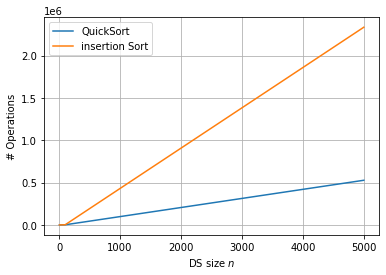

In [16]:
df = pd.DataFrame(
    {'DS size $n$': N_RUNS, 'QuickSort': b_ops, 'insertion Sort': f_ops})
df.set_index('DS size $n$', drop=True, inplace=True)
fig = df.plot().get_figure()
plt.ylabel('# Operations')
plt.grid()
fig.savefig('fsearch_analysis.png')


4. Evaluation plan - empirical



# Conclusions
In this study, we analyzed a PageRank algorithm for its theoretical and empirical complexity.

Empirical Time Complexity
Counting the number of operations by a counter is the most accurate way of empirical analysis of a function.


# References
https://www.geeksforgeeks.org/page-rank-algorithm-implementation/
https://towardsdatascience.com/pagerank-3c568a7d2332
https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d
https://cims.nyu.edu/~holmes/teaching/asa19/handout_Lecture2_2019.pdf